A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure should support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

Also ensure that an instance of the data structure can be visualy represented, e.g., in aSCII format.

# Implementation

In [84]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The data structure has been implemented as a class.

In [85]:
from ternary_search_tree import TernarySearchTree

# Example usage

Create a new empty ternery search tree.

In [86]:
tst = TernarySearchTree()

Insert the string `'abc'` into the tree.

In [87]:
tst.insert('abc')

Display the tree.

In [88]:
print(tst)

terminates: False
_gt  char: a, terminates: False
_eq    char: b, terminates: False
_eq      char: c, terminates: True


Insert another string `'aqt'`.

In [89]:
tst.insert('aqt')

In [90]:
print(tst)

terminates: False
_gt  char: a, terminates: False
_eq    char: b, terminates: False
_eq      char: c, terminates: True
_gt      char: q, terminates: False
_eq        char: t, terminates: True


The tree should now contain two strings.

In [91]:
len(tst)

2

In [92]:
tst.all_strings()

['abc', 'aqt']

Search for the string `'ab'`, it should be found since it is a prefix of `'abc'`.

In [93]:
tst.search('ab')

True

The string `'ac'` should not be found.

In [94]:
tst.search('ac')

False

The tree can also contain the empty string.

In [95]:
tst.insert('')

In [96]:
len(tst)

3

In [97]:
print(tst)

terminates: True
_gt  char: a, terminates: False
_eq    char: b, terminates: False
_eq      char: c, terminates: True
_gt      char: q, terminates: False
_eq        char: t, terminates: True


In [98]:
tst.all_strings()

['', 'abc', 'aqt']

# Testing

The file `data/search_trees/insert_words.txt` contains words that we can insert into a tree.

In [99]:
tst = TernarySearchTree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [100]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [101]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [102]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Chack that when searching for a exact match, only the inserted words are found, and no prefixes.

In [103]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), \
                   f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [104]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [105]:
assert not tst.search('', exact=True), 'empty string found'

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [106]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [107]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If not output was generated, all tests have passed.

# Performance

To assess the performance, i.e., the time it takes to insert a new string or search the ternary search tree as a function of the tree's size, we need a large dataset. This is provided in data/search_trees/corncob_lowercase.txt. This file contains over 58,000 English words, all lower case.

In [108]:
with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

In [109]:
len(words)

58110

In [110]:
import random
import time

In [111]:
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

In [112]:
samples = [
    random.sample(words, k=size) for size in sizes
]

We can now time how long it takes to insert words into a Ternary Search Tree of various sizes. First we build the TST based on the sample, and then we insert words.

In [113]:
nr_runs = 10
times = {}
insert_sample = random.sample(words, k=20)
for sample in samples:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            tst.insert(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.03317,
 500: 0.03344,
 1000: 0.03344,
 5000: 0.0392,
 10000: 0.05372,
 20000: 0.0402,
 30000: 0.27226,
 40000: 0.04001,
 50000: 0.04228}

In [114]:
import matplotlib.pyplot as plt

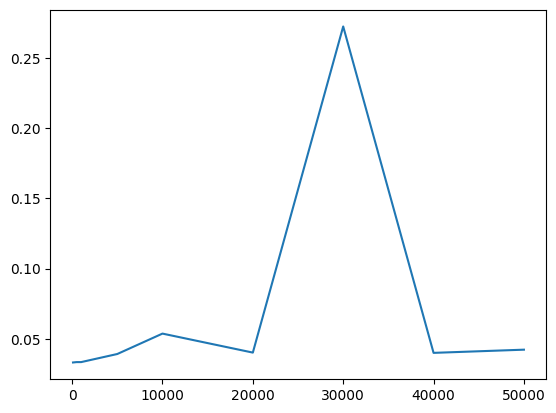

In [115]:
plt.plot(times.keys(), times.values());

We can do the same for searching words in a B-tree of various sizes. First we build the B-tree based on the sample, and then we search words.

In [116]:
nr_runs = 10
times = {}
search_sample = random.sample(words, k=20)
for sample in samples:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.01296,
 500: 0.01525,
 1000: 0.01645,
 5000: 0.02379,
 10000: 0.02642,
 20000: 0.0282,
 30000: 0.0298,
 40000: 0.02937,
 50000: 0.03081}

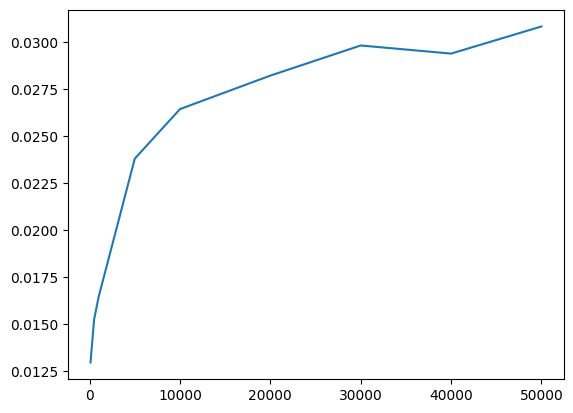

In [117]:
plt.plot(times.keys(), times.values());

In [118]:
nr_runs = 10
times = {}
for sample in samples:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        search_sample = random.sample(sample, k=20)
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.02509,
 500: 0.02522,
 1000: 0.0249,
 5000: 0.03406,
 10000: 0.04029,
 20000: 0.03555,
 30000: 0.03795,
 40000: 0.04146,
 50000: 0.04211}

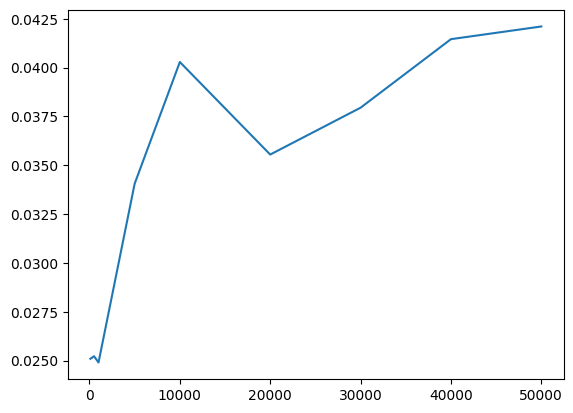

In [119]:
plt.plot(times.keys(), times.values());

## Comparison with Btree

In [120]:
from ternary_search_tree import Btree

In [121]:
with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]
random.shuffle(words)

In [122]:
hold_out_sample = words[-100:]
insert_sample = words[:-100]

In [123]:
%%timeit
btree = Btree()
for word in insert_sample:
    btree.insert(word)

119 ms ± 4.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [124]:
%%timeit
tst = TernarySearchTree()
for word in insert_sample:
    tst.insert(word)

168 ms ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [125]:
word_btree = Btree()
for word in insert_sample:
    word_btree.insert(word)

In [126]:
%%timeit
total = 0
for word in hold_out_sample:
    if word_btree.search(word):
        total += 1

171 μs ± 3.31 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [127]:
word_tst = TernarySearchTree()
for word in insert_sample:
    word_tst.insert(word)

In [128]:
%%timeit
total = 0
for word in hold_out_sample:
    if word_tst.search(word):
        total += 1

136 μs ± 2.26 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [139]:
nr_runs = 10
btree_times, tst_times = {}, {}
insert_sample = random.sample(words, k=20)
for sample in samples:
    tst = TernarySearchTree()
    btree = Btree()
    for word in sample:
        tst.insert(word)
        btree.insert(word)
    tst_times[len(sample)] = 0.0
    btree_times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            tst.insert(word)
        end_time = time.time_ns()
        tst_times[len(sample)] += end_time - start_time

        start_time = time.time_ns()
        for word in insert_sample:
            btree.insert(word)
        end_time = time.time_ns()
        btree_times[len(sample)] += end_time - start_time

    tst_times[len(sample)] /= nr_runs*1_000_000.0
    btree_times[len(sample)] /= nr_runs*1_000_000.0


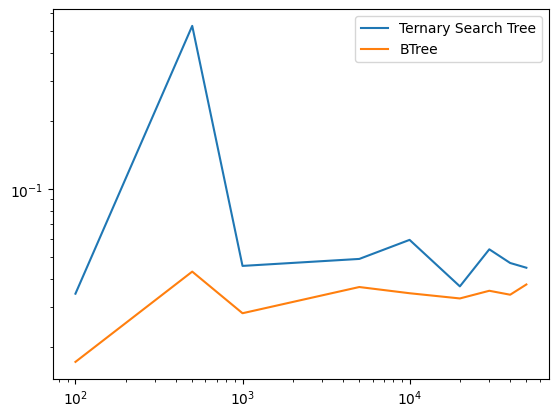

In [140]:
_ = plt.loglog(tst_times.keys(), tst_times.values(), label='Ternary Search Tree')
_ = plt.loglog(btree_times.keys(), btree_times.values(), label='BTree')
_ = plt.legend()

In [130]:
nr_runs = 10
btree_times, tst_times = {}, {}

search_sample = random.sample(words, k=20)
for sample in samples:
    tst = TernarySearchTree()
    btree = Btree()
    for word in sample:
        tst.insert(word)
        btree.insert(word)
    tst_times[len(sample)] = 0.0
    btree_times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word)
        end_time = time.time_ns()
        tst_times[len(sample)] += end_time - start_time
        start_time = time.time_ns()
        for word in search_sample:
            btree.search(word)
        end_time = time.time_ns()
        btree_times[len(sample)] += end_time - start_time
    tst_times[len(sample)] /= nr_runs*1_000_000.0
    btree_times[len(sample)] /= nr_runs*1_000_000.0



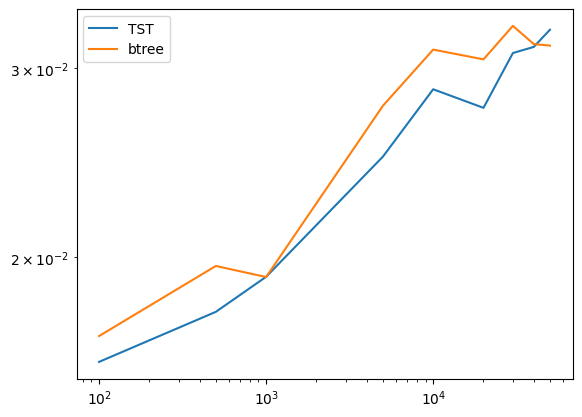

In [132]:
_ = plt.loglog(tst_times.keys(), tst_times.values(), label='Ternary Search Tree')
_ = plt.loglog(btree_times.keys(), btree_times.values(), label='BTree')
_ = plt.legend()

Btree performs better on inserts compared to our TernarySearchTree. TernarySearchTree performs better on search